In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_ppl = pd.read_csv('Traffic_Crashes_-_People.csv')
df_cars = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [6]:
df_crashes[['street_direction', 'street_name']] = df_crashes[['street_direction', 'street_name']].astype(str)
df_crashes['street']= df_crashes['street_direction'] + ' ' + df_crashes['street_name']

df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year

newdf = df_ppl[(df_ppl.person_type == "DRIVER")]

m1 = pd.merge(df_cars, newdf, how='left', on=['crash_record_id'])


m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])


df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df


,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,Na

In [7]:
df_19 = (df[df['crash_year'] >= 2019])

In [8]:
df_19['injury'] = df_19['injuries_total'] >= 1
df_19['injury'] = df_19['injury'].astype(int)
df_injury = df_19[df_19['injuries_total'] >= 1]

<ipython-input-8-0fb870a25322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['injury'] = df_19['injuries_total'] >= 1
<ipython-input-8-0fb870a25322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['injury'] = df_19['injury'].astype(int)


In [9]:
columns = ['crash_record_id', 'crash_date_x', 'latitude', 'longitude', 'injury', 'crash_month', 'crash_hour',
           'street_name', 'damage', 'hit_and_run_i', 'roadway_surface_cond', 'road_defect',
          'weather_condition', 'crash_day_of_week', 'driver_action', 'exceed_speed_limit_i',
          'prim_contributory_cause', 'first_crash_type', 'crash_year']
df_19 = df_19[columns]

In [13]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 18)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df_19['rush_hour'] = (df_19['crash_hour'].apply(rush_hour) & df['crash_day_of_week'].apply(rush_hour_day))
df_19['rush_hour'].value_counts()


False    191666
True      92604
Name: rush_hour, dtype: int64

In [14]:
df_19['rush_hour'] = df_19['rush_hour'].astype(int)

In [15]:
df_19['road_defect'].value_counts()

NO DEFECTS           233848
UNKNOWN               44893
RUT, HOLES             2291
OTHER                  1446
WORN SURFACE           1007
SHOULDER DEFECT         570
DEBRIS ON ROADWAY       215
Name: road_defect, dtype: int64

In [16]:
df_19 = df_19[df_19.road_defect != 'UNKNOWN']

In [17]:
def road_defect(status):
    if status == 'NO DEFECTS':
        return 0
    else:
        return 1
df_19['yes_road_defect'] = df_19['road_defect'].apply(road_defect)
df_19['yes_road_defect'] = df_19['yes_road_defect'].astype(int)
df_19['yes_road_defect'].value_counts()

0    233848
1      5529
Name: yes_road_defect, dtype: int64

In [105]:
df_19[['yes_road_defect', 'injury']].corr()

,yes_road_defect,injury
yes_road_defect,1.000000,-0.003107
injury,-0.003107,1.000000


In [112]:
df_19_rd = df_19.loc[df_19['yes_road_defect'] == 1]
df_19_nrd = df_19.loc[df_19['yes_road_defect'] == 0]

In [117]:
count = df_19_rd.groupby('street_name')['yes_road_defect'].sum()

In [133]:
count.sort_values(ascending=False).head(5)

street_name
WESTERN AVE         224
ASHLAND AVE         141
HALSTED ST          120
CICERO AVE          119
LAKE SHORE DR NB    105
Name: yes_road_defect, dtype: int64

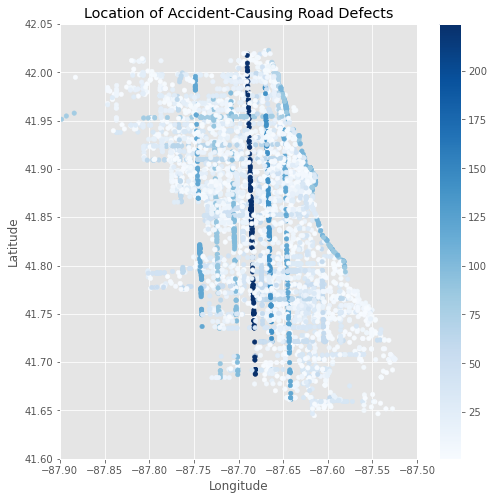

In [136]:
fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap =True)
hue = df_19_rd['street_name'].apply(lambda x: count[x])
points = ax.scatter(df_19_rd['longitude'], df_19_rd['latitude'], c=hue, s=20,
                   cmap = 'Blues')

ax.set_xlim((-87.9,-87.50))
ax.set_ylim((41.60,42.05))
fig.colorbar(points)
fig.set_size_inches(8,8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Location of Accident-Causing Road Defects');


In [19]:
df_weekday_19 = df_19[(df_19['crash_day_of_week'] >= 2) & (df_19['crash_day_of_week'] <= 6)]
df_weekday_19['crash_day_of_week'].value_counts()

6    38700
5    34145
3    33893
4    33689
2    32763
Name: crash_day_of_week, dtype: int64

## Distribution of accidents by hour

<AxesSubplot:xlabel='crash_hour'>

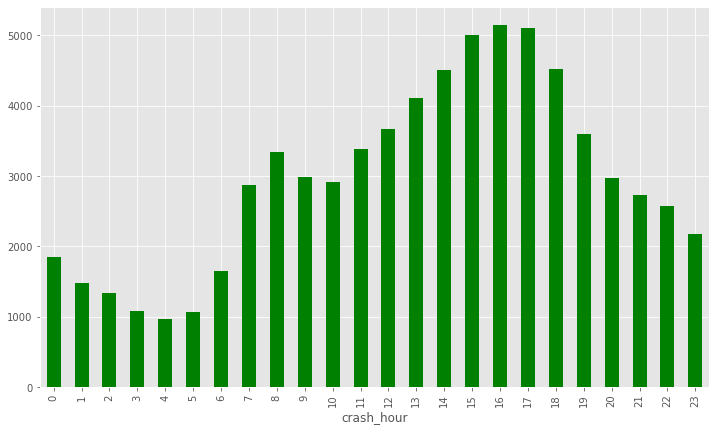

In [41]:
plt.style.use('ggplot')


accidents_by_hour = df_injury.groupby(df_injury['crash_hour']).count()
accidents_by_hour = accidents_by_hour['crash_date_x']
accidents_by_hour.plot(kind='bar', figsize=(12,7), color = 'green')

In [20]:
accidents_week = df_weekday_19.groupby(df_weekday_19['crash_hour']).count()['crash_date_x']

In [21]:
accidents_week.sum()

173190

In [22]:
accidents_week

crash_hour
0      2960
1      2279
2      1781
3      1334
4      1421
5      2218
6      4090
7      7936
8      9916
9      8591
10     8423
11     9434
12    10501
13    10640
14    11661
15    13518
16    14096
17    13671
18    10876
19     7773
20     6183
21     5280
22     4695
23     3913
Name: crash_date_x, dtype: int64

### Distribution of weekday accidents by hours (rush hour highlighted)

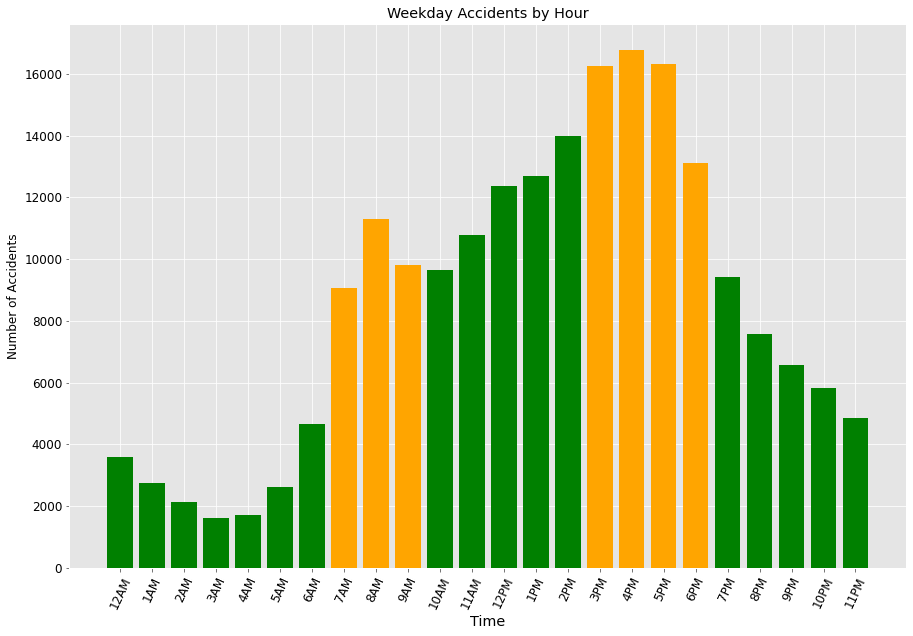

In [70]:
import datetime as dt
hours = ('12AM', '1AM', '2AM', '3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM')
crashes = [3579, 2750, 2124, 1601, 1692, 2607, 4671, 9056,
           11301, 9813, 9640, 10784, 12352, 12680, 14002, 
           16241, 16774, 16306, 13113, 9426, 7576, 6552, 5823, 4843]
plt.subplots(figsize=(15, 10))  
plt.xticks(rotation= 65, fontsize='large', c = 'black')
plt.yticks(c = 'black', fontsize='large')
plt.bar(hours, crashes, color = ['green', 'green', 'green','green','green','green','green','orange','orange','orange','green','green','green','green','green','orange','orange','orange','orange', 'green','green','green',])   

plt.title('Weekday Accidents by Hour')
plt.xlabel('Time', c='black', size='x-large')
plt.ylabel("Number of Accidents", c='black');



In [43]:
cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'Breaking Rules of Road',
              'IMPROPER LANE USAGE': 'Reckless/Poor Driving',
             'DISREGARDING TRAFFIC SIGNALS' : 'Breaking Rules of Road',
             'IMPROPER TURNING/NO SIGNAL': 'Reckless/Poor Driving',
              'DISREGARDING STOP SIGN' : 'Breaking Rules of Road',
             'DISREGARDING OTHER TRAFFIC SIGNS': 'Breaking Rules of Road',
             'DISREGARDING ROAD MARKINGS': 'Breaking Rules of Road',
             'DISREGARDING YIELD SIGN': 'Breaking Rules of Road',
             'PASSING STOPPED SCHOOL BUS': 'Breaking Rules of Road',
             'TURNING RIGHT ON RED': 'Breaking Rules of Road',
              'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed Related',
              'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed Related',
              'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed Related',
              'FOLLOWING TOO CLOSELY': 'Reckless/Poor Driving',
              'IMPROPER OVERTAKING/PASSING': 'Reckless/Poor Driving',
              'IMPROPER BACKING': 'Reckless/Poor Driving',
              'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Reckless/Poor Driving',
              'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless/Poor Driving',
              'DRIVING ON WRONG SIDE/WRONG WAY': 'Reckless/Poor Driving',
              'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Drug/Alcohol Related',
              'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Drug/Alcohol Related',
              'PHYSICAL CONDITION OF DRIVER': 'Reckless/Poor Driving',
              'DISTRACTION - FROM INSIDE VEHICLE':'Distracted Driving',
              'CELL PHONE USE OTHER THAN TEXTING':'Distracted Driving',
              'TEXTING':'Distracted Driving',
              'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'Distracted Driving',
              'WEATHER':"Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION':"Out of Driver's Control",
              'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':"Out of Driver's Control",
              'DISTRACTION - FROM OUTSIDE VEHICLE':"Out of Driver's Control",
              'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':"Out of Driver's Control",
              'ROAD CONSTRUCTION/MAINTENANCE':"Out of Driver's Control",
              'ANIMAL':"Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION': "Out of Driver's Control",
              'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':"Out of Driver's Control",
              'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"Out of Driver's Control",
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"Out of Driver's Control",
              'UNABLE TO DETERMINE': 'Other/Unknown',
              'NOT APPLICABLE': 'Other/Unknown',
              'OBSTRUCTED CROSSWALKS': 'Other/Unknown',
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown',
              'RELATED TO BUS STOP': 'Other/Unknown',
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown'}

df_19['Simple_Reason'] = df_19['prim_contributory_cause'].map(cause_dict)

<ipython-input-43-38d5ff89ea8e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19['Simple_Reason'] = df_19['prim_contributory_cause'].map(cause_dict)


In [47]:
df_19 = df_19[df_19.road_defect != 'UNKNOWN']
def rd_defect(x):
    if (x == 'NO DEFECTS'):
        return 0
    else:
        return 1

df_19['road_defect'] = (df_19['road_defect'].apply(rd_defect))

In [48]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 18)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df_19['rush_hour'] = (df_19['crash_hour'].apply(rush_hour) & df_19['crash_day_of_week'].apply(rush_hour_day))

In [45]:
df_19 = df_19[df_19.Simple_Reason != 'Other/Unknown']

In [46]:
df_19['Simple_Reason'].value_counts()

Reckless/Poor Driving      86421
Breaking Rules of Road     40932
Speed Related              14209
Out of Driver's Control    11944
Distracted Driving          2796
Drug/Alcohol Related        2049
Name: Simple_Reason, dtype: int64

In [51]:

df_injury['Simple_Reason'] = df_injury['prim_contributory_cause'].map(cause_dict)
df_injury = df_injury[df_injury.Simple_Reason != 'Other/Unknown']

<ipython-input-51-1d76835c37b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury['Simple_Reason'] = df_injury['prim_contributory_cause'].map(cause_dict)


In [52]:
acc_by_reason = df_19.groupby(df_19['Simple_Reason']).count()['crash_unit_id']
inj_by_reason = df_injury.groupby(df_injury['Simple_Reason']).count()['crash_unit_id']

In [53]:
total_inj = acc_by_reason.sort_values(ascending=True)

### Distribution of accidents by primary reason for crash

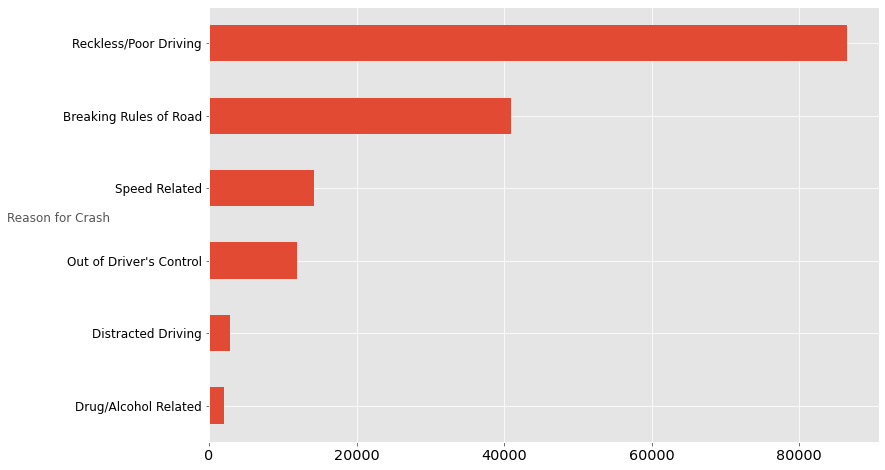

In [67]:
total_inj.plot(kind='barh', figsize=(12,8))

plt.xticks(rotation=0, c='black', fontsize='x-large')
plt.yticks(c='black', fontsize='large')
plt.ylabel('Reason for Crash', rotation = 0, fontsize='large');

#### Distribution of accidents with injuries by reason for crash

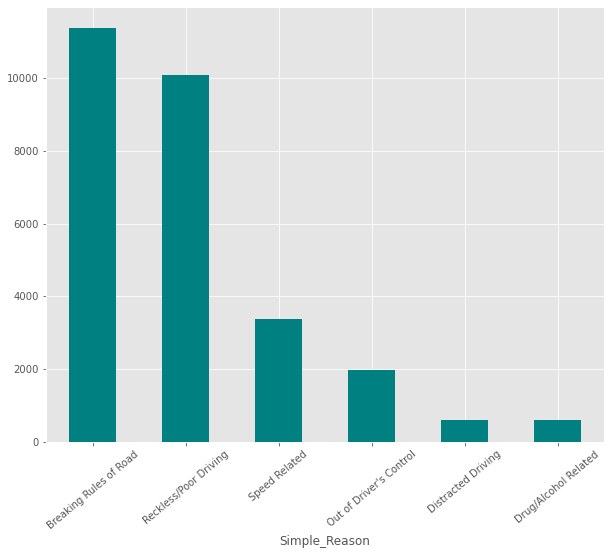

In [58]:
inj_by_reason.sort_values(ascending=False).plot(kind='bar',figsize=(10, 8), color = "teal")

plt.xticks(rotation=40);

In [56]:
reason_for_inj = (inj_by_reason / acc_by_reason).sort_values(ascending=True)

#### Proportions of accidents that resulting in an injury by reason for crash

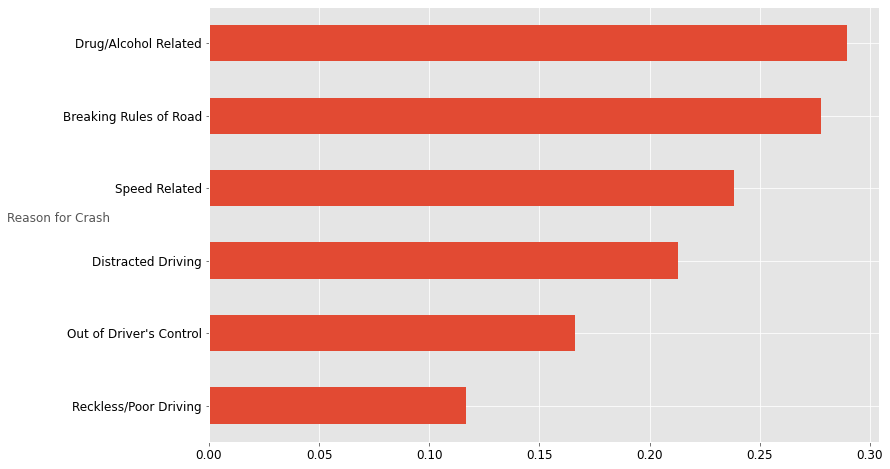

In [68]:
reason_for_inj.plot(kind='barh', figsize = (12, 8))

plt.xticks(rotation=0, c='black', fontsize='large')
plt.yticks(c='black', fontsize='large')
plt.ylabel('Reason for Crash', rotation = 0, fontsize='large');

In [60]:
df['rush_hour'].value_counts()

0    175380
1     96392
Name: rush_hour, dtype: int64

#### Percentages of rush hour accidents compared to overall hours

''

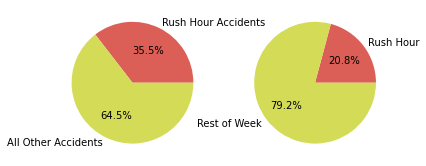

In [67]:
labels = 'Rush Hour Accidents', 'All Other Accidents'
sizes = [96392, 175380]

fig, axes = plt.subplots(1, 2)
axes[0].pie(sizes, labels = labels, autopct='%1.1f%%')
axes[1].pie([35, 133], labels = ('Rush Hour', 'Rest of Week'), autopct='%1.1f%%')
;